In [1]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt

os.chdir("/Users/jacobrichards/Desktop/DS_DA_Projects/Marketing_Prediction")

data = pd.read_csv("data.csv", na_values=["", "NA"])

# 1 Given the following data on 4000 customers, we are trying to predict whether they will respond to a marketing campaign.

In [2]:
display(data.head())

,id,age,dist,income,gender,marital_status,target
0,1,73,4.371654,"90-99,999",M,S,1
1,2,89,1.582733,"100-149,999",M,NaN,1
2,3,85,1.223810,"10-19,999",F,S,1
3,4,76,2.962427,"90-99,999",M,M,1
4,5,76,2.594408,"10-19,999",M,S,1


# 2 clean data 

In [3]:
import pandas as pd
import numpy as np

# Replace missing or empty values in columns 4, 5, 6 with "unknown"
data.iloc[:, [3, 4, 5]] = data.iloc[:, [3, 4, 5]].applymap(lambda x: "unknown" if pd.isna(x) or x == "" else x)

# Replace income with appropriate midpoints or custom values
income_mapping = {
    "unknown": 6,              # replacing unknown with the median income level
    "Under $10k": 1,            # midpoint of "Under $10k"
    "10-19,999": 2,            # midpoint of "10-19,999"
    "20-29,999": 3,            # midpoint of "20-29,999"
    "30-39,999": 4,            # midpoint of "30-39,999"
    "40-49,999": 5,            # midpoint of "40-49,999"
    "50-59,999": 6,            # midpoint of "50-59,999"
    "60-69,999": 7,            # midpoint of "60-69,999"
    "70-79,999": 8,            # midpoint of "70-79,999"
    "80-89,999": 9,            # midpoint of "80-89,999"
    "90-99,999": 10,            # midpoint of "90-99,999"
    "100-149,999": 11,         # midpoint of "100-149,999"
    "150 - 174,999": 12,       # midpoint of "150 - 174,999"
    "175 - 199,999": 13,       # midpoint of "175 - 199,999"
    "200 - 249,999": 14,       # midpoint of "200 - 249,999"
    "250k+": 15               # custom value for "250k+"
}
data["income"] = data["income"].map(income_mapping).astype(int)

# Replace gender with 1 for male, 0 for female, and 0 for unknown
gender_mapping = {"M": 1, "F": 0, "unknown": 0}
data["gender"] = data["gender"].map(gender_mapping).astype(int)

# Replace marital_status with 1 for married, 0 for single, and 1 for unknown
marital_status_mapping = {"M": 1, "S": 0, "unknown": 1}
data["marital_status"] = data["marital_status"].map(marital_status_mapping).astype(int)

# Convert target to categorical values (0 or 1)
data["target"] = data["target"].astype(int)

# Convert distance (dist) column to integer
data["dist"] = data["dist"].astype(int)

/var/folders/2y/cbtx_pl154qczd091zb0d4z40000gn/T/ipykernel_79277/2211222545.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data.iloc[:, [3, 4, 5]] = data.iloc[:, [3, 4, 5]].applymap(lambda x: "unknown" if pd.isna(x) or x == "" else x)


male is 1 and female is 0
married is 1 and single is 0
responded is 1 and did not respond is 0

In [4]:
display(data.head())

,id,age,dist,income,gender,marital_status,target
0,1,73,4,10,1,0,1
1,2,89,1,11,1,1,1
2,3,85,1,2,0,0,1
3,4,76,2,10,1,1,1
4,5,76,2,2,1,0,1


Let's see what happens when we run a logistic regression model on this data. Without checking the data for the predictors relationship to the target or verifying pre-requosite assumptions of the model.

# 3 run logistic regression without checking the data 

Model Intercept: -4.5547880441748685

Feature Coefficients:
age: 0.0488
dist: -0.0162
income: -0.1106
gender: 0.4162
marital_status: 0.4290

Training Accuracy: 0.754
Testing Accuracy: 0.715


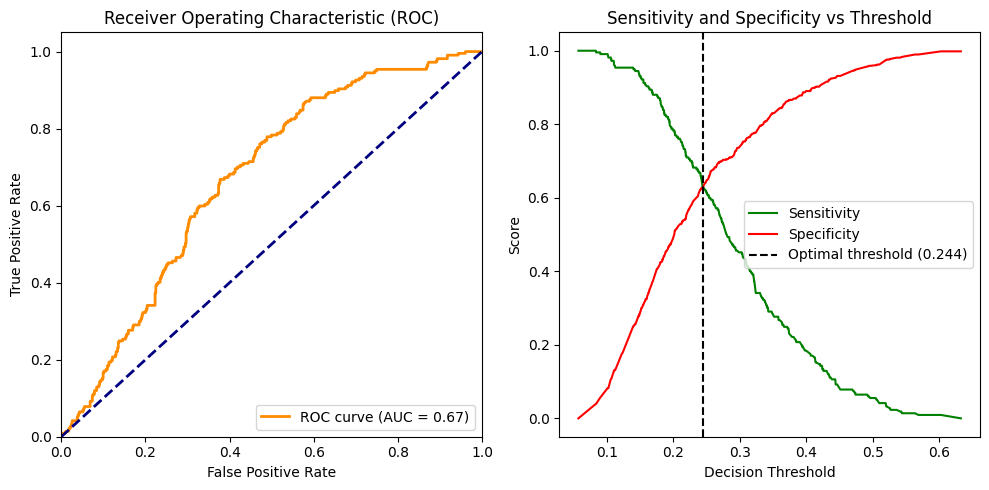

Optimal threshold: 0.244
At this threshold:
Sensitivity: 0.627
Specificity: 0.628


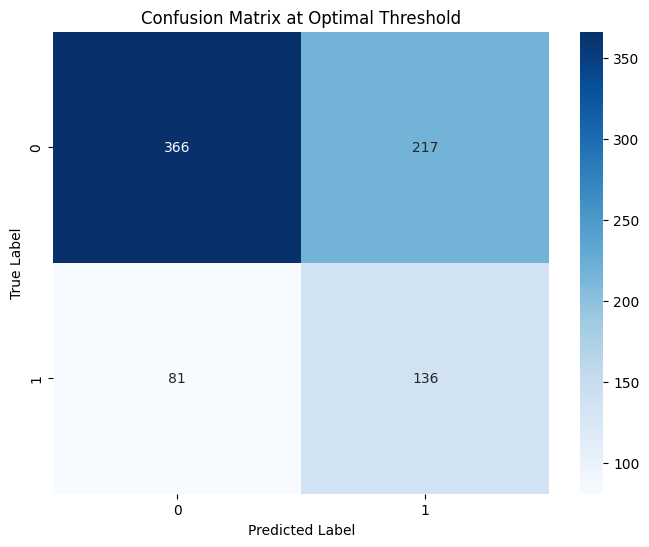

Lift Chart for Logistic Regression Model:

Logistic Regression Lift Chart Data:


,Lift Curve,Baseline,Lift
0,0.0,0.0,0.0
1,15.6,10.0,5.6
2,31.4,20.0,11.4
3,46.5,30.0,16.5
4,61.3,40.0,21.3
5,72.1,50.0,22.1
6,78.9,60.0,18.9
7,85.8,70.0,15.8
8,92.0,80.0,12.0
9,97.2,90.0,7.2


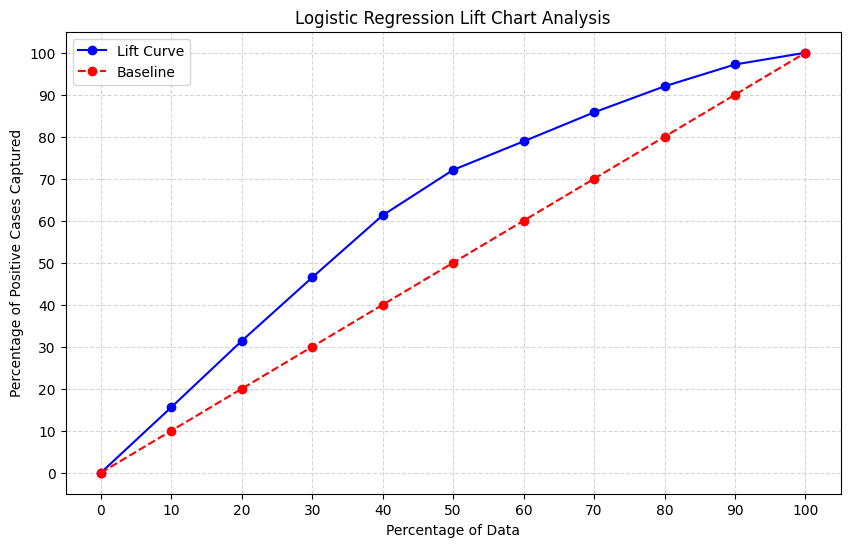

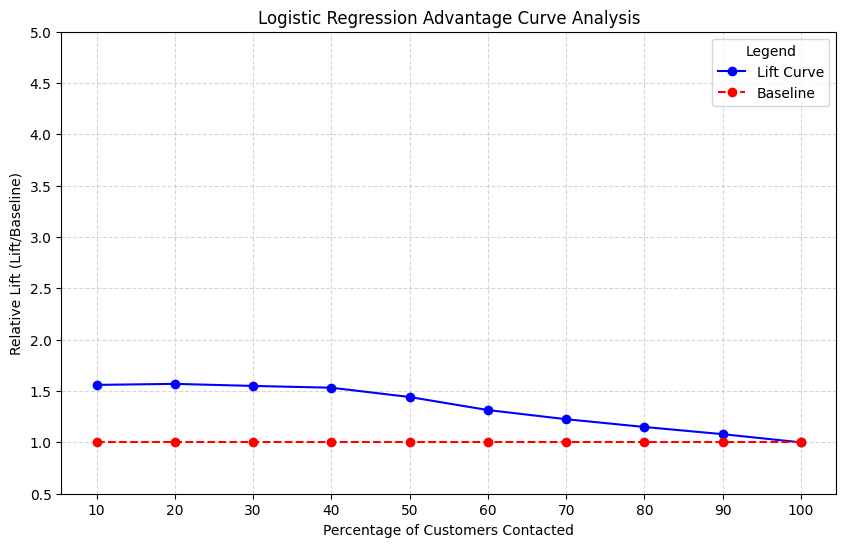


Top rows of sorted data (by predicted probabilities):


,id,age,dist,income,gender,marital_status,target,predicted_probs
3917,3918,94,1,2,1,1,0,0.655432
2393,2394,94,2,2,1,1,1,0.651772
442,443,94,3,2,1,1,1,0.648094
2151,2152,94,0,3,1,1,0,0.633796
460,461,92,1,2,1,1,1,0.633055



Top rows of shuffled data (random order):


,id,age,dist,income,gender,marital_status,target,predicted_probs
0,556,77,5,11,0,0,0,0.109804
1,3492,82,3,11,1,1,1,0.274687
2,528,80,3,11,0,1,0,0.184691
3,3926,73,1,3,1,0,0,0.284534
4,2990,69,5,2,1,1,0,0.344707


In [5]:
# LOGISTIC REGRESSION MODEL

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Prepare features (X) and target (y)
X = data[['age', 'dist', 'income', 'gender', 'marital_status']]
y = data['target']

# Add a constant (intercept) to the features
X = sm.add_constant(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the logistic regression model with increased max_iter
log_reg = LogisticRegression(random_state=42, fit_intercept=True, max_iter=1000)
log_reg.fit(X_train, y_train)

# Print model parameters including intercept
print("Model Intercept:", log_reg.intercept_[0])
print("\nFeature Coefficients:")
for feature, coef in zip(X.columns[1:], log_reg.coef_[0][1:]):  # Skip the constant column
    print(f"{feature}: {coef:.4f}")

# Calculate and print the model accuracy
train_accuracy = log_reg.score(X_train, y_train)
test_accuracy = log_reg.score(X_test, y_test)

print(f"\nTraining Accuracy: {train_accuracy:.3f}")
print(f"Testing Accuracy: {test_accuracy:.3f}")

# Get prediction probabilities
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]

# Calculate ROC curve points
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Calculate sensitivity and specificity for different thresholds
sensitivity = tpr
specificity = 1 - fpr

# Find optimal threshold where sensitivity and specificity are closest
differences = np.abs(sensitivity - specificity)
optimal_idx = np.argmin(differences)
optimal_threshold = thresholds[optimal_idx]

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot ROC curve
ax1.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
ax1.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
ax1.set_xlim([0.0, 1.0])
ax1.set_ylim([0.0, 1.05])
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('Receiver Operating Characteristic (ROC)')
ax1.legend(loc="lower right")

# Plot sensitivity/specificity vs threshold
ax2.plot(thresholds, sensitivity, label='Sensitivity', color='green')
ax2.plot(thresholds, specificity, label='Specificity', color='red')
ax2.axvline(x=optimal_threshold, color='black', linestyle='--', label=f'Optimal threshold ({optimal_threshold:.3f})')
ax2.set_xlabel('Decision Threshold')
ax2.set_ylabel('Score')
ax2.set_title('Sensitivity and Specificity vs Threshold')
ax2.legend()

plt.tight_layout()
plt.show()

# Find optimal threshold where sensitivity and specificity are closest
differences = np.abs(sensitivity - specificity)
optimal_idx = np.argmin(differences)
optimal_threshold = thresholds[optimal_idx]

print(f"Optimal threshold: {optimal_threshold:.3f}")
print(f"At this threshold:")
print(f"Sensitivity: {sensitivity[optimal_idx]:.3f}")
print(f"Specificity: {specificity[optimal_idx]:.3f}")

# Get predictions using optimal threshold
y_pred_optimal = (y_pred_proba >= optimal_threshold).astype(int)

# Calculate and plot confusion matrix
cm = confusion_matrix(y_test, y_pred_optimal)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix at Optimal Threshold')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Train Logistic Regression model and get predictions for lift chart
predictors = ['age', 'income', 'dist', 'gender', 'marital_status']
target = 'target'

# Split data into training and test sets
X = data[predictors]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit Logistic Regression model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

# Predict probabilities for the entire dataset
data['predicted_probs'] = lr_model.predict_proba(X)[:, 1]

# Sort and shuffle data
data_sorted_lr = data.sort_values(by='predicted_probs', ascending=False)
data_shuffled_lr = data.sample(frac=1, random_state=42).reset_index(drop=True)

def lift_chart(sorted_data, shuffled_data):
    """
    Computes and plots the lift chart comparing sorted vs shuffled data
    
    Parameters:
    - sorted_data: DataFrame sorted by predicted probabilities
    - shuffled_data: DataFrame in random order
    """
    # Calculate cumulative positives at each decile
    total_positives = sorted_data['target'].sum()
    n_rows = len(sorted_data)
    
    lift_curve = []
    baseline_curve = []
    
    for i in range(11):
        cutoff = int((i/10) * n_rows)
        
        # Lift curve from sorted data
        lift_percentage = sorted_data.iloc[:cutoff]['target'].sum() / total_positives * 100
        lift_curve.append(lift_percentage)
        
        # Baseline from shuffled data 
        baseline_percentage = (i/10) * 100
        baseline_curve.append(baseline_percentage)
    
    # Create results DataFrame
    lift_data = pd.DataFrame({
        'Lift Curve': lift_curve,
        'Baseline': baseline_curve
    })
    lift_data['Lift'] = lift_data['Lift Curve'] - lift_data['Baseline']
    
    print("\nLogistic Regression Lift Chart Data:")
    display(lift_data)
    
    # Plot lift chart
    plt.figure(figsize=(10, 6))
    plt.plot(np.linspace(0, 100, 11), lift_data['Lift Curve'],
             label='Lift Curve', color='blue', marker='o')
    plt.plot(np.linspace(0, 100, 11), lift_data['Baseline'],
             label='Baseline', color='red', linestyle='--', marker='o')
    
    plt.title('Logistic Regression Lift Chart Analysis')
    plt.xlabel('Percentage of Data')
    plt.ylabel('Percentage of Positive Cases Captured')
    plt.xticks(np.linspace(0, 100, 11))
    plt.yticks(np.linspace(0, 100, 11))
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()
    
    # Calculate and plot advantage curve
    advantage_data = lift_data.copy()
    advantage_data['Lift Curve'] = advantage_data['Lift Curve'] / advantage_data['Baseline']
    advantage_data['Baseline'] = advantage_data['Baseline'] / advantage_data['Baseline']
    advantage_data = advantage_data.iloc[1:] # Remove first row to avoid division by zero
    
    plt.figure(figsize=(10, 6))
    plt.plot(np.linspace(10, 100, 10), advantage_data['Lift Curve'],
             label='Lift Curve', color='blue', marker='o')
    plt.plot(np.linspace(10, 100, 10), advantage_data['Baseline'],
             label='Baseline', color='red', linestyle='--', marker='o')
    
    plt.title('Logistic Regression Advantage Curve Analysis')
    plt.xlabel('Percentage of Customers Contacted')
    plt.ylabel('Relative Lift (Lift/Baseline)')
    plt.xticks(np.linspace(10, 100, 10))
    plt.ylim(0.5, 5)
    plt.legend(title='Legend')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()
    
    return lift_data

# Generate lift chart
print("Lift Chart for Logistic Regression Model:")
lift_data_lr = lift_chart(data_sorted_lr, data_shuffled_lr)

print("\nTop rows of sorted data (by predicted probabilities):")
display(data_sorted_lr.head())

print("\nTop rows of shuffled data (random order):")
display(data_shuffled_lr.head())

# 4 poor performance

This performance is very poor. 

The observation with the highest predicted probability of response wasn't even a responder. 

Aswell, when the customers are sampled in order of greatest predicted probability to least, it's not until we've sampled 50% of the customer base that that we have obtaned 70% of the totall posative responses as opposed to recieving 50% of the responses by that point if our sampling was purely random. 

# 5 what if we just ran random forest? 

Training Accuracy: 0.973
Testing Accuracy: 0.680


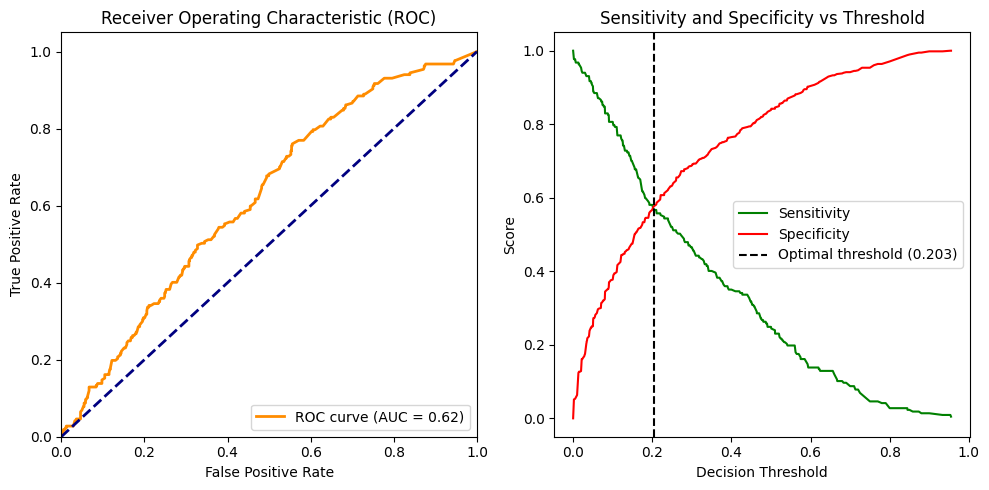

Optimal threshold: 0.203
At this threshold:
Sensitivity: 0.567
Specificity: 0.576


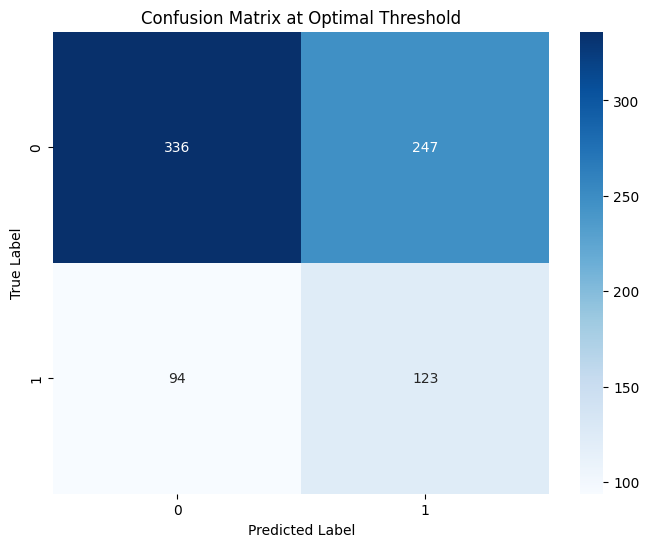


Random Forest Lift Chart Data:


,Lift Curve,Baseline,Lift
0,0.0,0.0,0.0
1,37.3,10.0,27.3
2,72.9,20.0,52.9
3,88.7,30.0,58.7
4,92.2,40.0,52.2
5,95.0,50.0,45.0
6,96.7,60.0,36.7
7,98.1,70.0,28.1
8,98.8,80.0,18.8
9,99.3,90.0,9.3


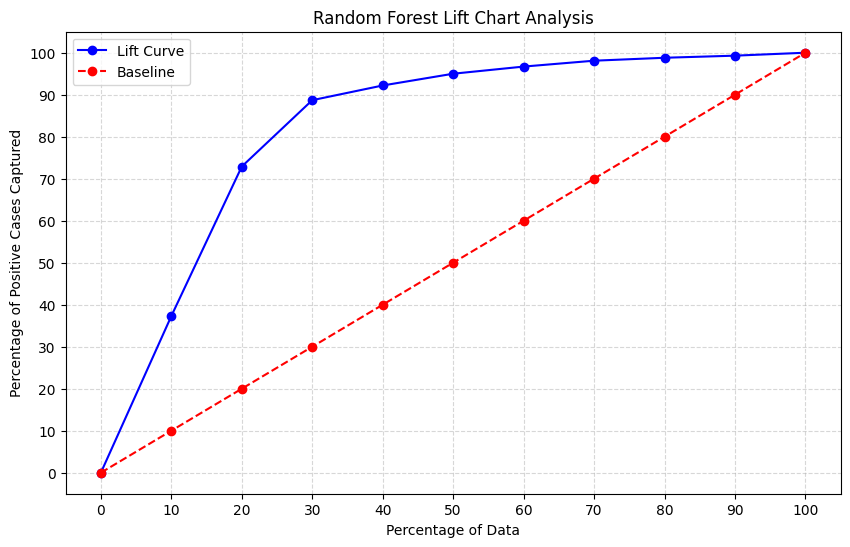

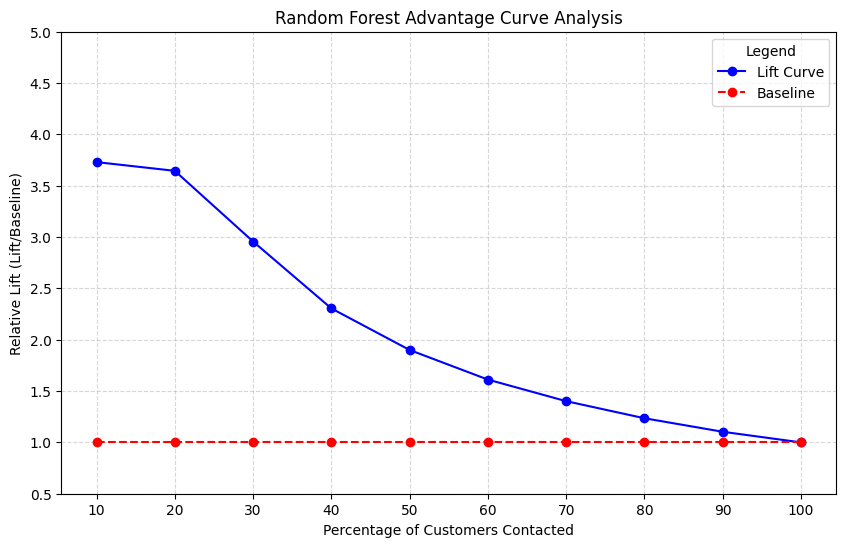


Top rows of sorted data (by predicted probabilities):


,id,age,dist,income,gender,marital_status,target,predicted_probs
585,586,80,16,4,1,1,1,0.99
1804,1805,80,16,4,1,1,1,0.99
2726,2727,79,0,2,0,1,1,0.98
171,172,77,5,11,1,1,1,0.98
702,703,85,2,10,1,1,1,0.98



Top rows of shuffled data (random order):


,id,age,dist,income,gender,marital_status,target,predicted_probs
0,556,77,5,11,0,0,0,0.080
1,3492,82,3,11,1,1,1,0.060
2,528,80,3,11,0,1,0,0.160
3,3926,73,1,3,1,0,0,0.255
4,2990,69,5,2,1,1,0,0.285


In [6]:
# 1. Train Random Forest model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Prepare features (X) and target (y)
X = data[['age', 'dist', 'income', 'gender', 'marital_status']]
y = data['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the random forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Calculate and print model accuracy
train_accuracy = rf_model.score(X_train, y_train)
test_accuracy = rf_model.score(X_test, y_test)

print(f"Training Accuracy: {train_accuracy:.3f}")
print(f"Testing Accuracy: {test_accuracy:.3f}")

# 2. ROC Curve
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get prediction probabilities
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve points
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Calculate sensitivity and specificity
sensitivity = tpr
specificity = 1 - fpr

# Find optimal threshold
differences = np.abs(sensitivity - specificity)
optimal_idx = np.argmin(differences)
optimal_threshold = thresholds[optimal_idx]

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot ROC curve
ax1.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
ax1.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
ax1.set_xlim([0.0, 1.0])
ax1.set_ylim([0.0, 1.05])
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('Receiver Operating Characteristic (ROC)')
ax1.legend(loc="lower right")

# Plot sensitivity/specificity vs threshold
ax2.plot(thresholds, sensitivity, label='Sensitivity', color='green')
ax2.plot(thresholds, specificity, label='Specificity', color='red')
ax2.axvline(x=optimal_threshold, color='black', linestyle='--', label=f'Optimal threshold ({optimal_threshold:.3f})')
ax2.set_xlabel('Decision Threshold')
ax2.set_ylabel('Score')
ax2.set_title('Sensitivity and Specificity vs Threshold')
ax2.legend()

plt.tight_layout()
plt.show()

# 3. Print threshold metrics and confusion matrix
print(f"Optimal threshold: {optimal_threshold:.3f}")
print(f"At this threshold:")
print(f"Sensitivity: {sensitivity[optimal_idx]:.3f}")
print(f"Specificity: {specificity[optimal_idx]:.3f}")

# Get predictions using optimal threshold
y_pred_optimal = (y_pred_proba >= optimal_threshold).astype(int)

# Calculate and plot confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_optimal)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix at Optimal Threshold')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# 4. Lift Chart and Advantage Curve
# Get predictions for entire dataset
data['predicted_probs'] = rf_model.predict_proba(X)[:, 1]

# Sort and shuffle data
data_sorted = data.sort_values(by='predicted_probs', ascending=False)
data_shuffled = data.sample(frac=1, random_state=42).reset_index(drop=True)

# Calculate lift chart data
total_positives = data_sorted['target'].sum()
n_rows = len(data_sorted)

lift_curve = []
baseline_curve = []

for i in range(11):
    cutoff = int((i/10) * n_rows)
    lift_percentage = data_sorted.iloc[:cutoff]['target'].sum() / total_positives * 100
    baseline_percentage = (i/10) * 100
    lift_curve.append(lift_percentage)
    baseline_curve.append(baseline_percentage)

# Create lift chart DataFrame
lift_data = pd.DataFrame({
    'Lift Curve': lift_curve,
    'Baseline': baseline_curve
})
lift_data['Lift'] = lift_data['Lift Curve'] - lift_data['Baseline']
# ... previous code up to lift_data creation ...

# Display lift chart data table
print("\nRandom Forest Lift Chart Data:")
display(lift_data)

# ... rest of the code (visualizations and data previews) ...
# Plot lift chart
plt.figure(figsize=(10, 6))
plt.plot(np.linspace(0, 100, 11), lift_data['Lift Curve'],
         label='Lift Curve', color='blue', marker='o')
plt.plot(np.linspace(0, 100, 11), lift_data['Baseline'],
         label='Baseline', color='red', linestyle='--', marker='o')

plt.title('Random Forest Lift Chart Analysis')
plt.xlabel('Percentage of Data')
plt.ylabel('Percentage of Positive Cases Captured')
plt.xticks(np.linspace(0, 100, 11))
plt.yticks(np.linspace(0, 100, 11))
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Plot advantage curve
advantage_data = lift_data.copy()
advantage_data['Lift Curve'] = advantage_data['Lift Curve'] / advantage_data['Baseline']
advantage_data['Baseline'] = advantage_data['Baseline'] / advantage_data['Baseline']
advantage_data = advantage_data.iloc[1:] # Remove first row to avoid division by zero

plt.figure(figsize=(10, 6))
plt.plot(np.linspace(10, 100, 10), advantage_data['Lift Curve'],
         label='Lift Curve', color='blue', marker='o')
plt.plot(np.linspace(10, 100, 10), advantage_data['Baseline'],
         label='Baseline', color='red', linestyle='--', marker='o')

plt.title('Random Forest Advantage Curve Analysis')
plt.xlabel('Percentage of Customers Contacted')
plt.ylabel('Relative Lift (Lift/Baseline)')
plt.xticks(np.linspace(10, 100, 10))
plt.ylim(0.5, 5)
plt.legend(title='Legend')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# ... previous code remains the same until after the advantage curve plot ...

# Display preview of sorted and shuffled data
print("\nTop rows of sorted data (by predicted probabilities):")
display(data_sorted.head())

print("\nTop rows of shuffled data (random order):")
display(data_shuffled.head())

# 6 good performance 

Within sampling only 30% of the customer base random forest obtained 90% of the posative outcomes. 

# 7 why did Logistic Reggression perform so poorly and Random Forest Perform so well 

# SNS seaborn plot

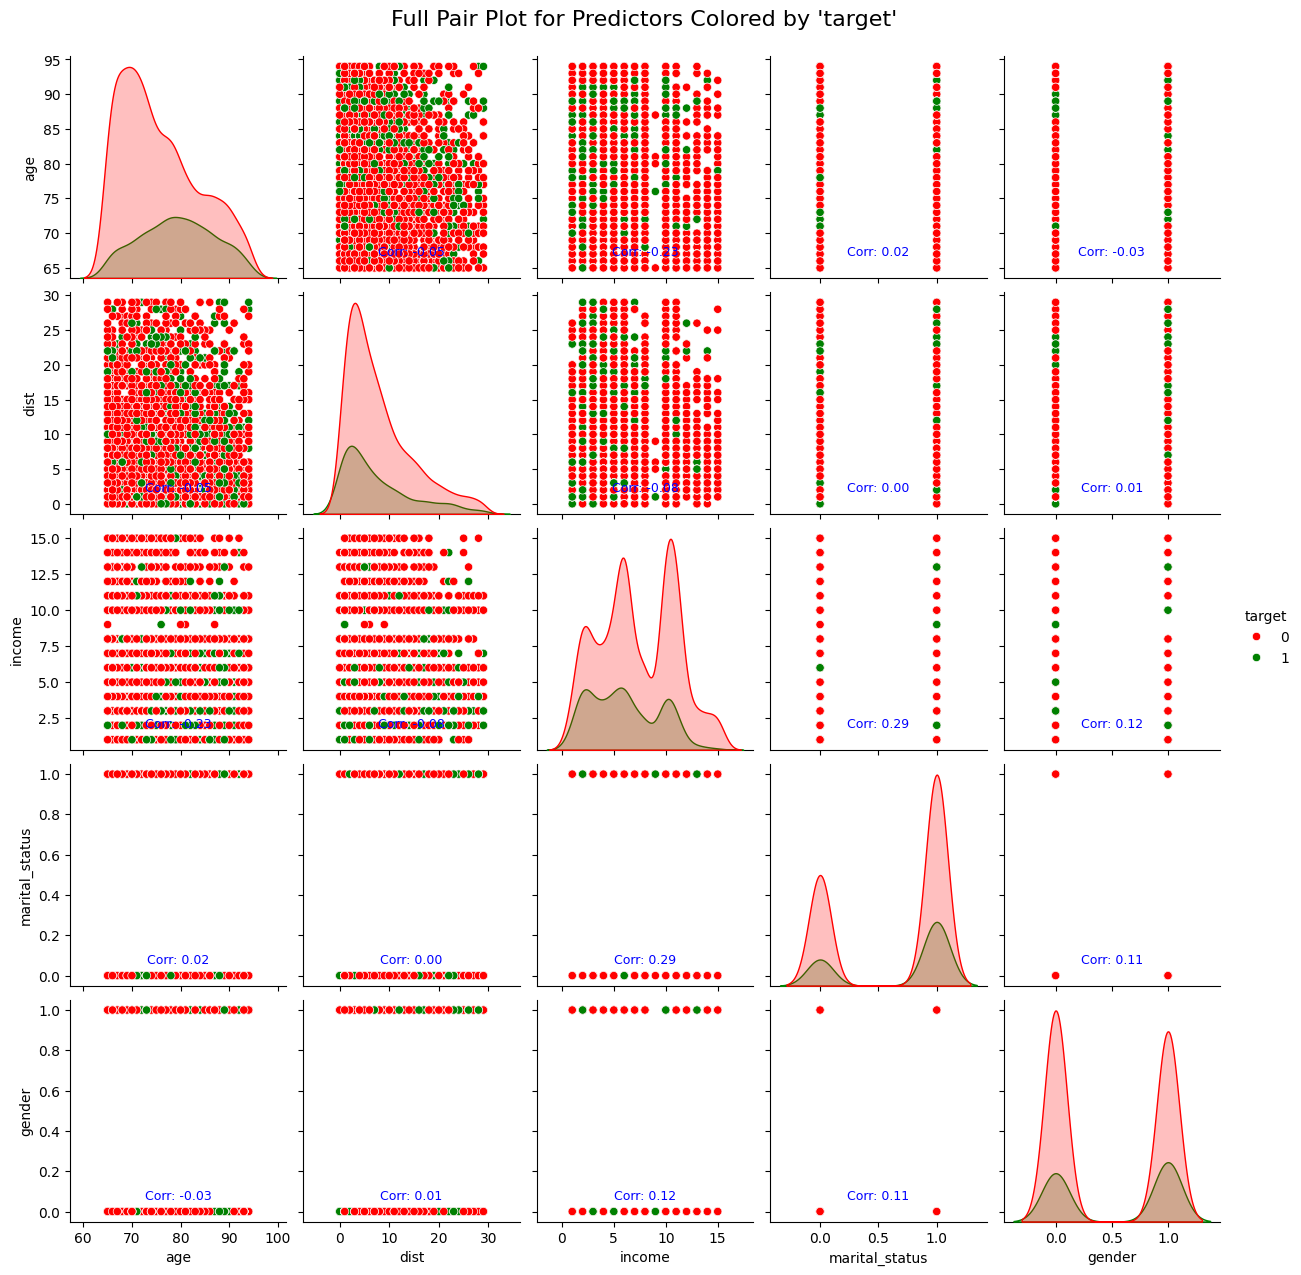

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_full_pairplot_with_corr_binary_target(df, continuous_vars, target_var='target', positive_value=1, negative_value=0):
    """
    Generate a Seaborn pair plot with correlation coefficients annotated on the scatter plots,
    showing a full matrix, and color-coded by a binary target variable.

    Parameters:
    - df: DataFrame containing the data.
    - continuous_vars: List of continuous variable column names.
    - target_var: Name of the binary target column (default='target').
    - positive_value: Value representing positive outcomes (default=1).
    - negative_value: Value representing negative outcomes (default=0).
    """
    # Filter DataFrame for the required columns
    pairplot_data = df[continuous_vars + [target_var]].copy()
    
    # Ensure the target variable is categorical for coloring
    pairplot_data[target_var] = pairplot_data[target_var].astype('category')
    
    # Calculate pairwise correlations
    correlation_matrix = pairplot_data[continuous_vars].corr()
    
    # Create the pair plot
    g = sns.pairplot(
        pairplot_data,
        hue=target_var,
        palette={positive_value: 'green', negative_value: 'red'},
        diag_kind='kde',
        corner=False  # Full matrix
    )
    
    # Annotate correlation coefficients
    for i, row_var in enumerate(continuous_vars):
        for j, col_var in enumerate(continuous_vars):
            if i != j:  # Skip diagonal
                # Get the current axis
                ax = g.axes[i, j]
                # Get the correlation value
                corr = correlation_matrix.loc[row_var, col_var]
                # Annotate the correlation on the scatter plot
                ax.annotate(
                    f"Corr: {corr:.2f}",
                    xy=(0.5, 0.1),
                    xycoords="axes fraction",
                    ha="center",
                    fontsize=9,
                    color="blue"
                )
    
    # Add a title for context
    plt.suptitle(f"Full Pair Plot for Predictors Colored by '{target_var}'", y=1.02, fontsize=16)
    plt.show()

# Continuous variables and target variable
continuous_vars = ['age', 'dist', 'income', 'marital_status', 'gender']
target_var = 'target'

# Call the function with the DataFrame
plot_full_pairplot_with_corr_binary_target(data, continuous_vars, target_var, positive_value=1, negative_value=0)

## income didn't matter at all, the top 90% combinations went from incomme levels 1 to 11 which is almost all of the distributions so its meanningless


Analyzing patterns in strong positive predictions...


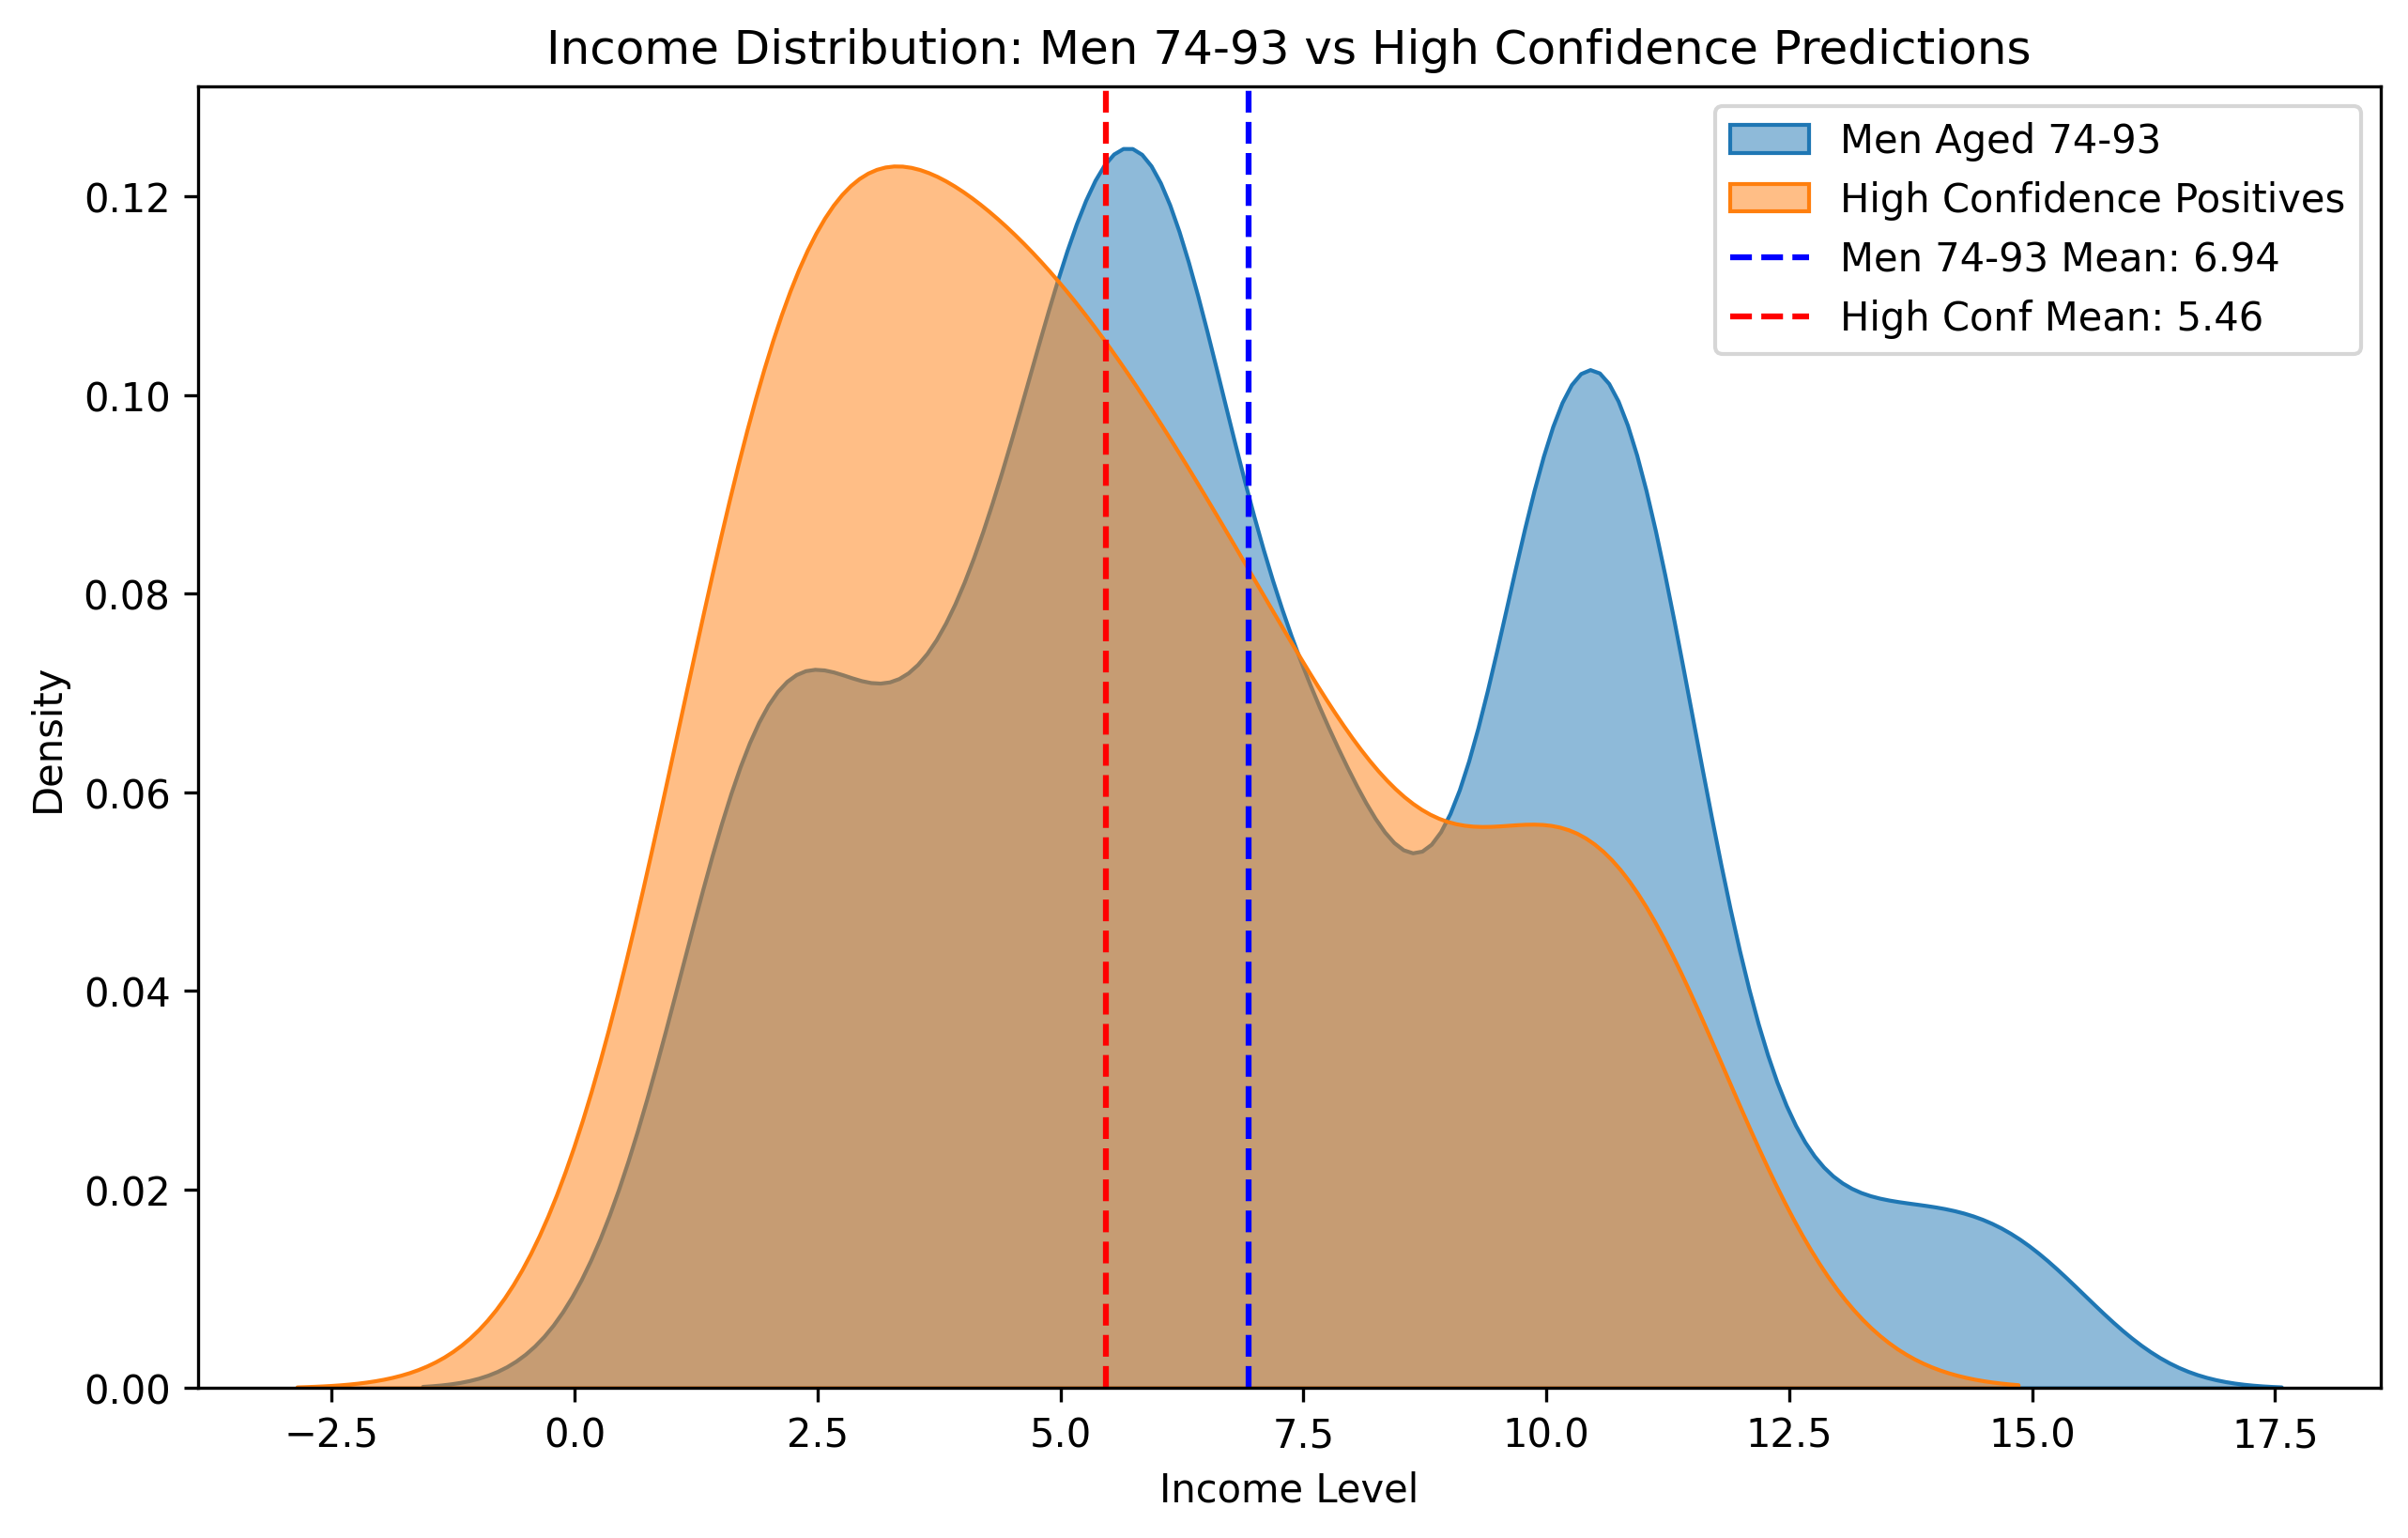


Mean income for men aged 74-93: 6.94
Mean income for high confidence positive predictions: 5.46


In [17]:
# Analyze patterns of high-confidence positive predictions
print("\nAnalyzing patterns in strong positive predictions...")

# Filter for men aged 74-93
filtered_data = data_sorted[(data_sorted['age'] >= 74) & 
                          (data_sorted['age'] <= 93) &
                          (data_sorted['gender'] == 1)].copy()

# Get samples where model is very confident of positive outcome (predicted_probs > 0.9)
high_confidence_positives = data_sorted[data_sorted['predicted_probs'] > 0.9].copy()

# Calculate mean incomes
mean_income_filtered = filtered_data['income'].mean()
mean_income_high_conf = high_confidence_positives['income'].mean()

# Plot distributions and means
plt.figure(figsize=(10, 6))
sns.kdeplot(data=filtered_data, x='income', fill=True, alpha=0.5,
            label='Men Aged 74-93')
sns.kdeplot(data=high_confidence_positives, x='income', fill=True, alpha=0.5, 
            label='High Confidence Positives')
plt.axvline(x=mean_income_filtered, color='b', linestyle='--',
            label=f'Men 74-93 Mean: {mean_income_filtered:.2f}')
plt.axvline(x=mean_income_high_conf, color='r', linestyle='--', 
            label=f'High Conf Mean: {mean_income_high_conf:.2f}')
plt.title('Income Distribution: Men 74-93 vs High Confidence Predictions')
plt.xlabel('Income Level')
plt.ylabel('Density')
plt.legend()
plt.show()

# Print the mean income values
print(f"\nMean income for men aged 74-93: {mean_income_filtered:.2f}")
print(f"Mean income for high confidence positive predictions: {mean_income_high_conf:.2f}")

1. off the main diagonals are scatterplots of the predictor variables with green dots coresponding to posative outcomes of the variable pair within observations and red dots for negative outcomes. Within this data we fail to see a clear pattern of posative or negative at the intersection of variables increasing or decreasing linearly.

2. across the diagnonal are the density curves of the predictors stratified by the values which corespond to posative or negative outcomes within observations. 

3. only within the density plots of age and income do we see signifigant difference in the values corespsonging to different outcomes. Thus these will be out two strongest predictors of posative outcome. 


# distributions stratified by outcome

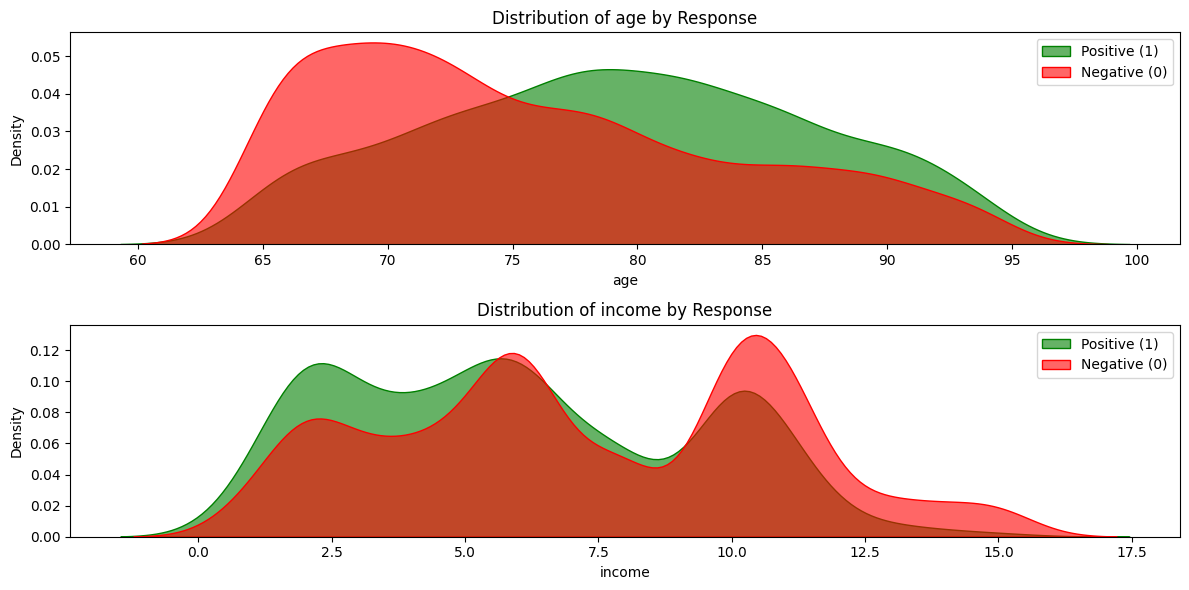

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def ridge_plot_by_response(df, variables, categorical_var='target', positive_value=1, negative_value=0):
    """
    Create ridge line plots for variables showing the distribution for positive and negative responses.
    
    Parameters:
    - df: DataFrame containing the data.
    - variables: List of continuous variables to plot.
    - categorical_var: Name of the binary target column.
    - positive_value: Value representing positive outcomes (default=1).
    - negative_value: Value representing negative outcomes (default=0).
    """
    # Create the ridge plot for each variable
    plt.figure(figsize=(12, 6))
    
    for i, var in enumerate(variables):
        plt.subplot(2, 1, i + 1)
        
        # Positive responses
        sns.kdeplot(data=df[df[categorical_var] == positive_value], x=var, 
                    fill=True, alpha=0.6, label=f'Positive ({positive_value})', color='green')
        
        # Negative responses
        sns.kdeplot(data=df[df[categorical_var] == negative_value], x=var, 
                    fill=True, alpha=0.6, label=f'Negative ({negative_value})', color='red')
        
        # Add plot details
        plt.title(f'Distribution of {var} by Response')
        plt.xlabel(var)
        plt.ylabel('Density')
        plt.legend()
    
    plt.tight_layout()
    plt.show()

# Example usage:
variables = ['age', 'income']
ridge_plot_by_response(data, variables, categorical_var='target', positive_value=1, negative_value=0)

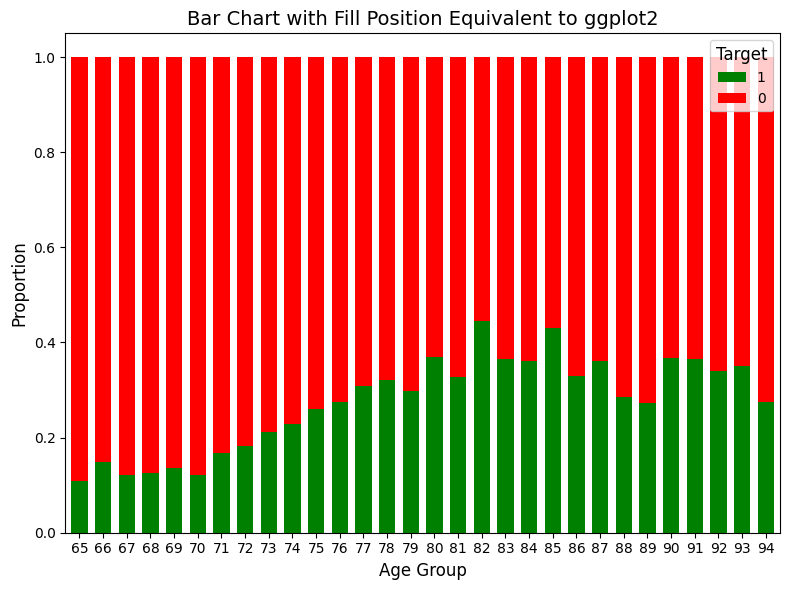

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming `data` is a DataFrame that exists
df = data.copy()

# Calculate normalized proportions within each 'age' group
proportions = (
    df.groupby(["age", "target"])
    .size()
    .unstack(fill_value=0)
    .apply(lambda x: x / x.sum(), axis=1)
)

# Plot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot stacked bars with normalized height
proportions[[1, 0]].plot(  # Reorder columns to put 1 on bottom
    kind="bar",
    stacked=True,
    ax=ax,
    width=0.7,
    legend=True,
    color=['green', 'red']  # Set explicit colors
)

# Add labels and title
ax.set_title("Bar Chart with Fill Position Equivalent to ggplot2", fontsize=14)
ax.set_ylabel("Proportion", fontsize=12)
ax.set_xlabel("Age Group", fontsize=12)

# Customize x-axis labels to be horizontal
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center')

# Customize legend
ax.legend(title="Target", title_fontsize=12, fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()

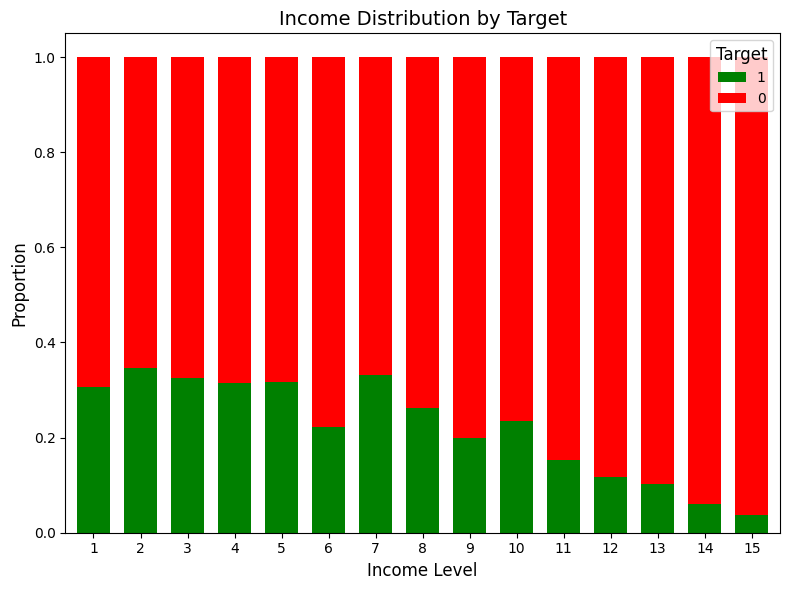

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming `data` is a DataFrame that exists
df = data.copy()

# Calculate normalized proportions within each 'income' group
proportions = (
    df.groupby(["income", "target"])
    .size()
    .unstack(fill_value=0)
    .apply(lambda x: x / x.sum(), axis=1)
)

# Plot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot stacked bars with normalized height
proportions[[1, 0]].plot(  # Reorder columns to put 1 on bottom
    kind="bar",
    stacked=True,
    ax=ax,
    width=0.7,
    legend=True,
    color=['green', 'red']  # Set explicit colors
)

# Add labels and title
ax.set_title("Income Distribution by Target", fontsize=14)
ax.set_ylabel("Proportion", fontsize=12)
ax.set_xlabel("Income Level", fontsize=12)

# Customize x-axis labels to be horizontal
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center')

# Customize legend
ax.legend(title="Target", title_fontsize=12, fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()

# Modeled probabilites of posative response as a function of each predictor 

Optimization terminated successfully.
         Current function value: 0.527865
         Iterations 6


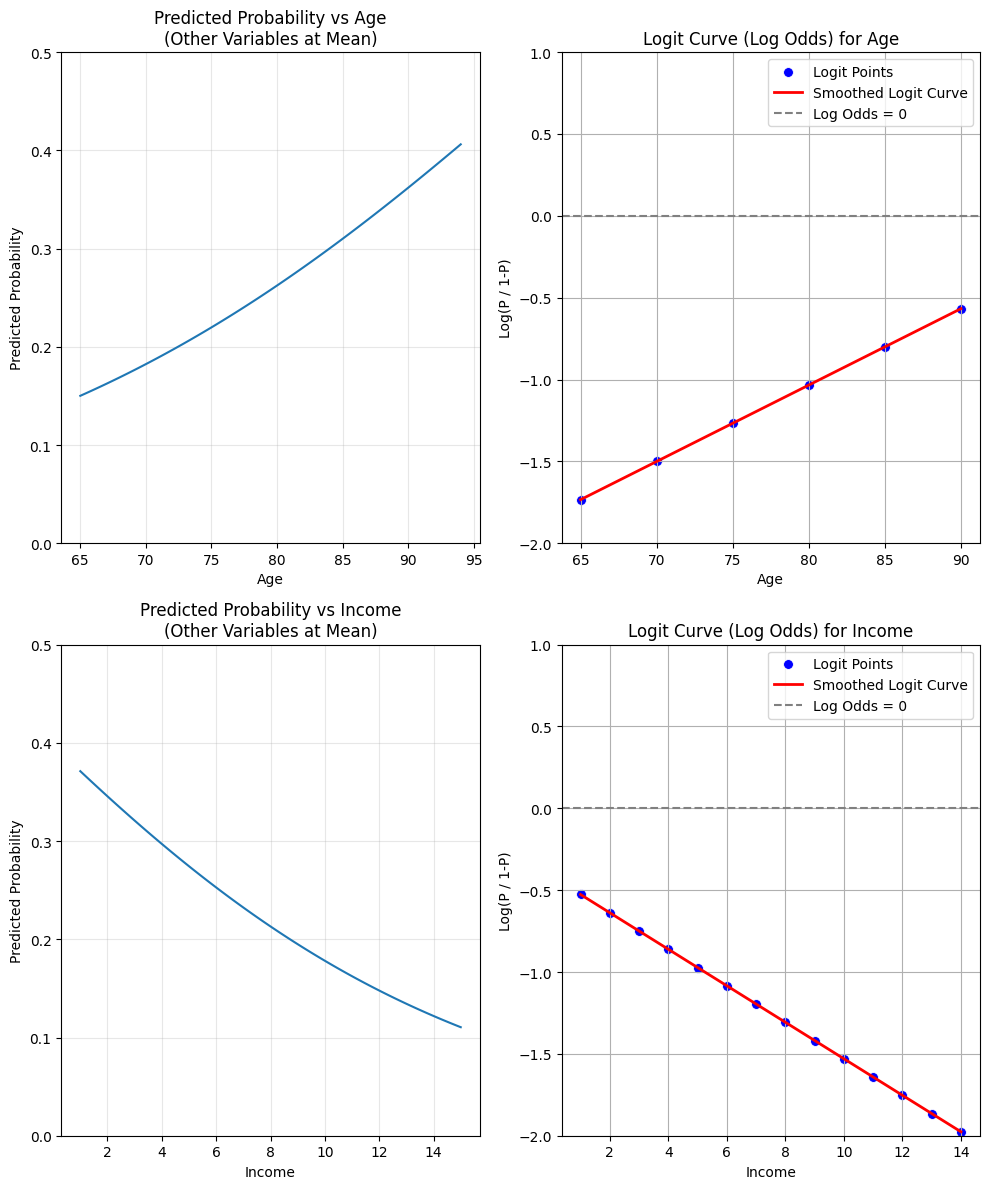

In [12]:
# Plot predicted probabilities and logit for age and income
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm

# Prepare features and fit model
X = data[['age', 'dist', 'income', 'gender', 'marital_status']]
y = data['target']

# Fit logistic regression model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X, y)

# Create figure with four subplots (2 rows, 2 columns)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 12))

# Get mean values for all predictors
mean_values = X.mean()

# Age plots
# Create range of values for age
x_range_age = np.linspace(X['age'].min(), X['age'].max(), 100)

# Create prediction data with all other variables at mean
pred_data_age = np.tile(mean_values, (100, 1))
pred_data_age = pd.DataFrame(pred_data_age, columns=X.columns)
pred_data_age['age'] = x_range_age

# Get predictions for age
y_pred_age = lr_model.predict_proba(pred_data_age)[:, 1]

# Plot predicted probabilities for age
ax1.plot(x_range_age, y_pred_age)
ax1.set_title('Predicted Probability vs Age\n(Other Variables at Mean)')
ax1.set_ylabel('Predicted Probability')
ax1.set_xlabel('Age')
ax1.grid(True, alpha=0.3)
ax1.set_ylim(0, 0.5)

# Age logit curve
# Fit statsmodels logistic regression
X_with_const = sm.add_constant(X)
logit_model = sm.Logit(y, X_with_const)
result = logit_model.fit()

# Calculate logit values for age
feature_values_age = np.arange(X['age'].min(), X['age'].max(), 5)
fixed_predictors = mean_values.copy()
log_odds_age = []

for value in feature_values_age:
    temp_predictors = fixed_predictors.copy()
    temp_predictors['age'] = value
    predictors_with_const = sm.add_constant(temp_predictors.values.reshape(1, -1), has_constant='add')
    logit = np.dot(predictors_with_const, result.params)
    log_odds_age.append(logit[0])

# Create DataFrame for age plotting
plot_df_age = pd.DataFrame({
    'age': feature_values_age,
    'log_odds': log_odds_age
})

# Plot logit curve for age
sns.scatterplot(x='age', y='log_odds', data=plot_df_age, color='blue', s=50, ax=ax2, label='Logit Points')
sns.regplot(x='age', y='log_odds', data=plot_df_age, scatter=False, lowess=True, 
            color='red', line_kws={'lw': 2}, ax=ax2, label='Smoothed Logit Curve')

ax2.set_title('Logit Curve (Log Odds) for Age')
ax2.set_xlabel('Age')
ax2.set_ylabel('Log(P / 1-P)')
ax2.set_ylim(-2, 1)
ax2.axhline(0, color='grey', linestyle='--', label='Log Odds = 0')
ax2.legend()
ax2.grid(True)

# Income plots
# Create range of values for income
x_range_income = np.linspace(X['income'].min(), X['income'].max(), 100)

# Create prediction data with all other variables at mean
pred_data_income = np.tile(mean_values, (100, 1))
pred_data_income = pd.DataFrame(pred_data_income, columns=X.columns)
pred_data_income['income'] = x_range_income

# Get predictions for income
y_pred_income = lr_model.predict_proba(pred_data_income)[:, 1]

# Plot predicted probabilities for income
ax3.plot(x_range_income, y_pred_income)
ax3.set_title('Predicted Probability vs Income\n(Other Variables at Mean)')
ax3.set_ylabel('Predicted Probability')
ax3.set_xlabel('Income')
ax3.grid(True, alpha=0.3)
ax3.set_ylim(0, 0.5)

# Income logit curve
# Calculate logit values for income
feature_values_income = np.arange(X['income'].min(), X['income'].max(), 1)
fixed_predictors = mean_values.copy()
log_odds_income = []

for value in feature_values_income:
    temp_predictors = fixed_predictors.copy()
    temp_predictors['income'] = value
    predictors_with_const = sm.add_constant(temp_predictors.values.reshape(1, -1), has_constant='add')
    logit = np.dot(predictors_with_const, result.params)
    log_odds_income.append(logit[0])

# Create DataFrame for income plotting
plot_df_income = pd.DataFrame({
    'income': feature_values_income,
    'log_odds': log_odds_income
})

# Plot logit curve for income
sns.scatterplot(x='income', y='log_odds', data=plot_df_income, color='blue', s=50, ax=ax4, label='Logit Points')
sns.regplot(x='income', y='log_odds', data=plot_df_income, scatter=False, lowess=True, 
            color='red', line_kws={'lw': 2}, ax=ax4, label='Smoothed Logit Curve')

ax4.set_title('Logit Curve (Log Odds) for Income')
ax4.set_xlabel('Income')
ax4.set_ylabel('Log(P / 1-P)')
ax4.set_ylim(-2, 1)
ax4.axhline(0, color='grey', linestyle='--', label='Log Odds = 0')
ax4.legend()
ax4.grid(True)

plt.tight_layout()
plt.show()

Just as Linear Regression models the response by transformation of the predictor by a linear equation, Logistic regression, models the Log(ods) by transformation of the predictor by linear equation. Thus the resulting Probability as a function of the predictor variable will have a linear form.

However, our response does not coorelate linearly beyond age 80, thus our Logistic Regression model does not capture the true relationship between age and posative outcomes as it models the log(ods) as a linear equation. When we analyse the results of the random forest model, the consequence of the Logistic regression models failure to capture the true relationship between age and outcome will be evident.

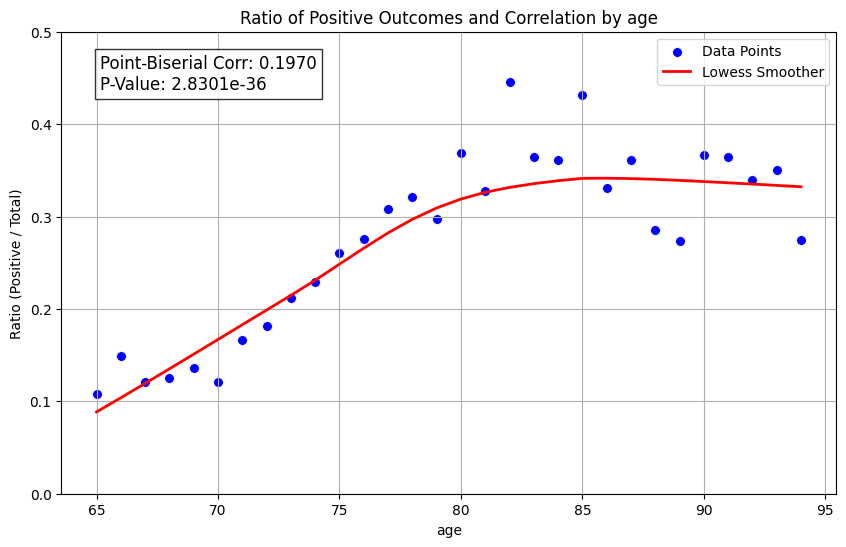

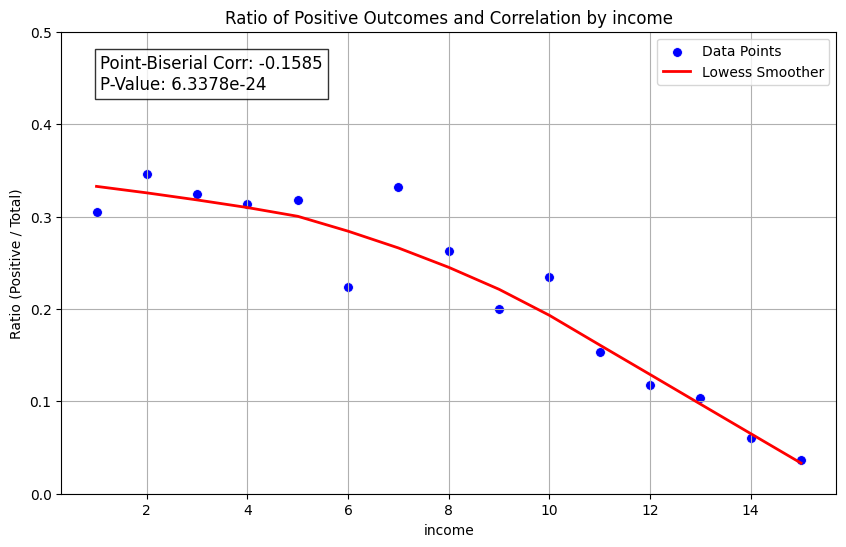

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pointbiserialr

def plot_ratio_positive_negative_with_corr(df, continuous_var, categorical_var='target', positive_value=1, negative_value=0):
    """
    Plot the ratio of positive to total outcomes for a continuous variable with a smoother
    and display the correlation coefficient.
    
    Parameters:
    - df: DataFrame containing the data.
    - continuous_var: Name of the continuous predictor column.
    - categorical_var: Name of the binary target column.
    - positive_value: Value representing positive outcomes (default=1).
    - negative_value: Value representing negative outcomes (default=0).
    """
    # Group by continuous variable and category to get counts
    grouped = df.groupby([continuous_var, categorical_var]).size().reset_index(name='count')
    
    # Pivot so we have positive and negative counts
    pivot = grouped.pivot(index=continuous_var, columns=categorical_var, values='count').fillna(0)
    
    # Extract positive and total counts
    positive_counts = pivot[positive_value] if positive_value in pivot.columns else 0
    total_counts = positive_counts + pivot[negative_value] if negative_value in pivot.columns else positive_counts

    # To avoid division by zero, add a small epsilon
    epsilon = 1e-9
    ratio = positive_counts / (total_counts + epsilon)

    # Create a DataFrame for plotting
    plot_df = pd.DataFrame({
        continuous_var: ratio.index,
        'ratio_positive_negative': ratio.values
    })
    
    # Calculate Point-Biserial Correlation
    correlation, p_value = pointbiserialr(df[continuous_var], df[categorical_var])
    
    # Plot the points and smoother
    plt.figure(figsize=(10, 6))
    
    # Scatter plot of ratio points
    sns.scatterplot(x=continuous_var, y='ratio_positive_negative', data=plot_df, color='blue', s=50, label='Data Points')

    # Add a smooth trend line (lowess)
    sns.regplot(x=continuous_var, y='ratio_positive_negative', data=plot_df, 
                scatter=False, lowess=True, color='red', line_kws={'lw': 2}, label='Lowess Smoother')

    # Add the correlation coefficient as text on the plot
    plt.text(0.05, 0.95, f'Point-Biserial Corr: {correlation:.4f}\nP-Value: {p_value:.4e}', 
             transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.8))
    
    # Final plot settings
    plt.title(f'Ratio of Positive Outcomes and Correlation by {continuous_var}')
    plt.xlabel(continuous_var)
    plt.ylabel('Ratio (Positive / Total)')
    plt.ylim(0, 0.50)  # Set y-axis limit from 0 to 0.50
    plt.legend()
    plt.grid()
    plt.show()

# Example usage:
plot_ratio_positive_negative_with_corr(data, 'age', 'target', positive_value=1, negative_value=0)
plot_ratio_positive_negative_with_corr(data, 'income', 'target', positive_value=1, negative_value=0)


Since income and age are our strongest predictors, rather than plot age by increasing income and stratify for response, what if we plotted age by decreasing income and statified for response.

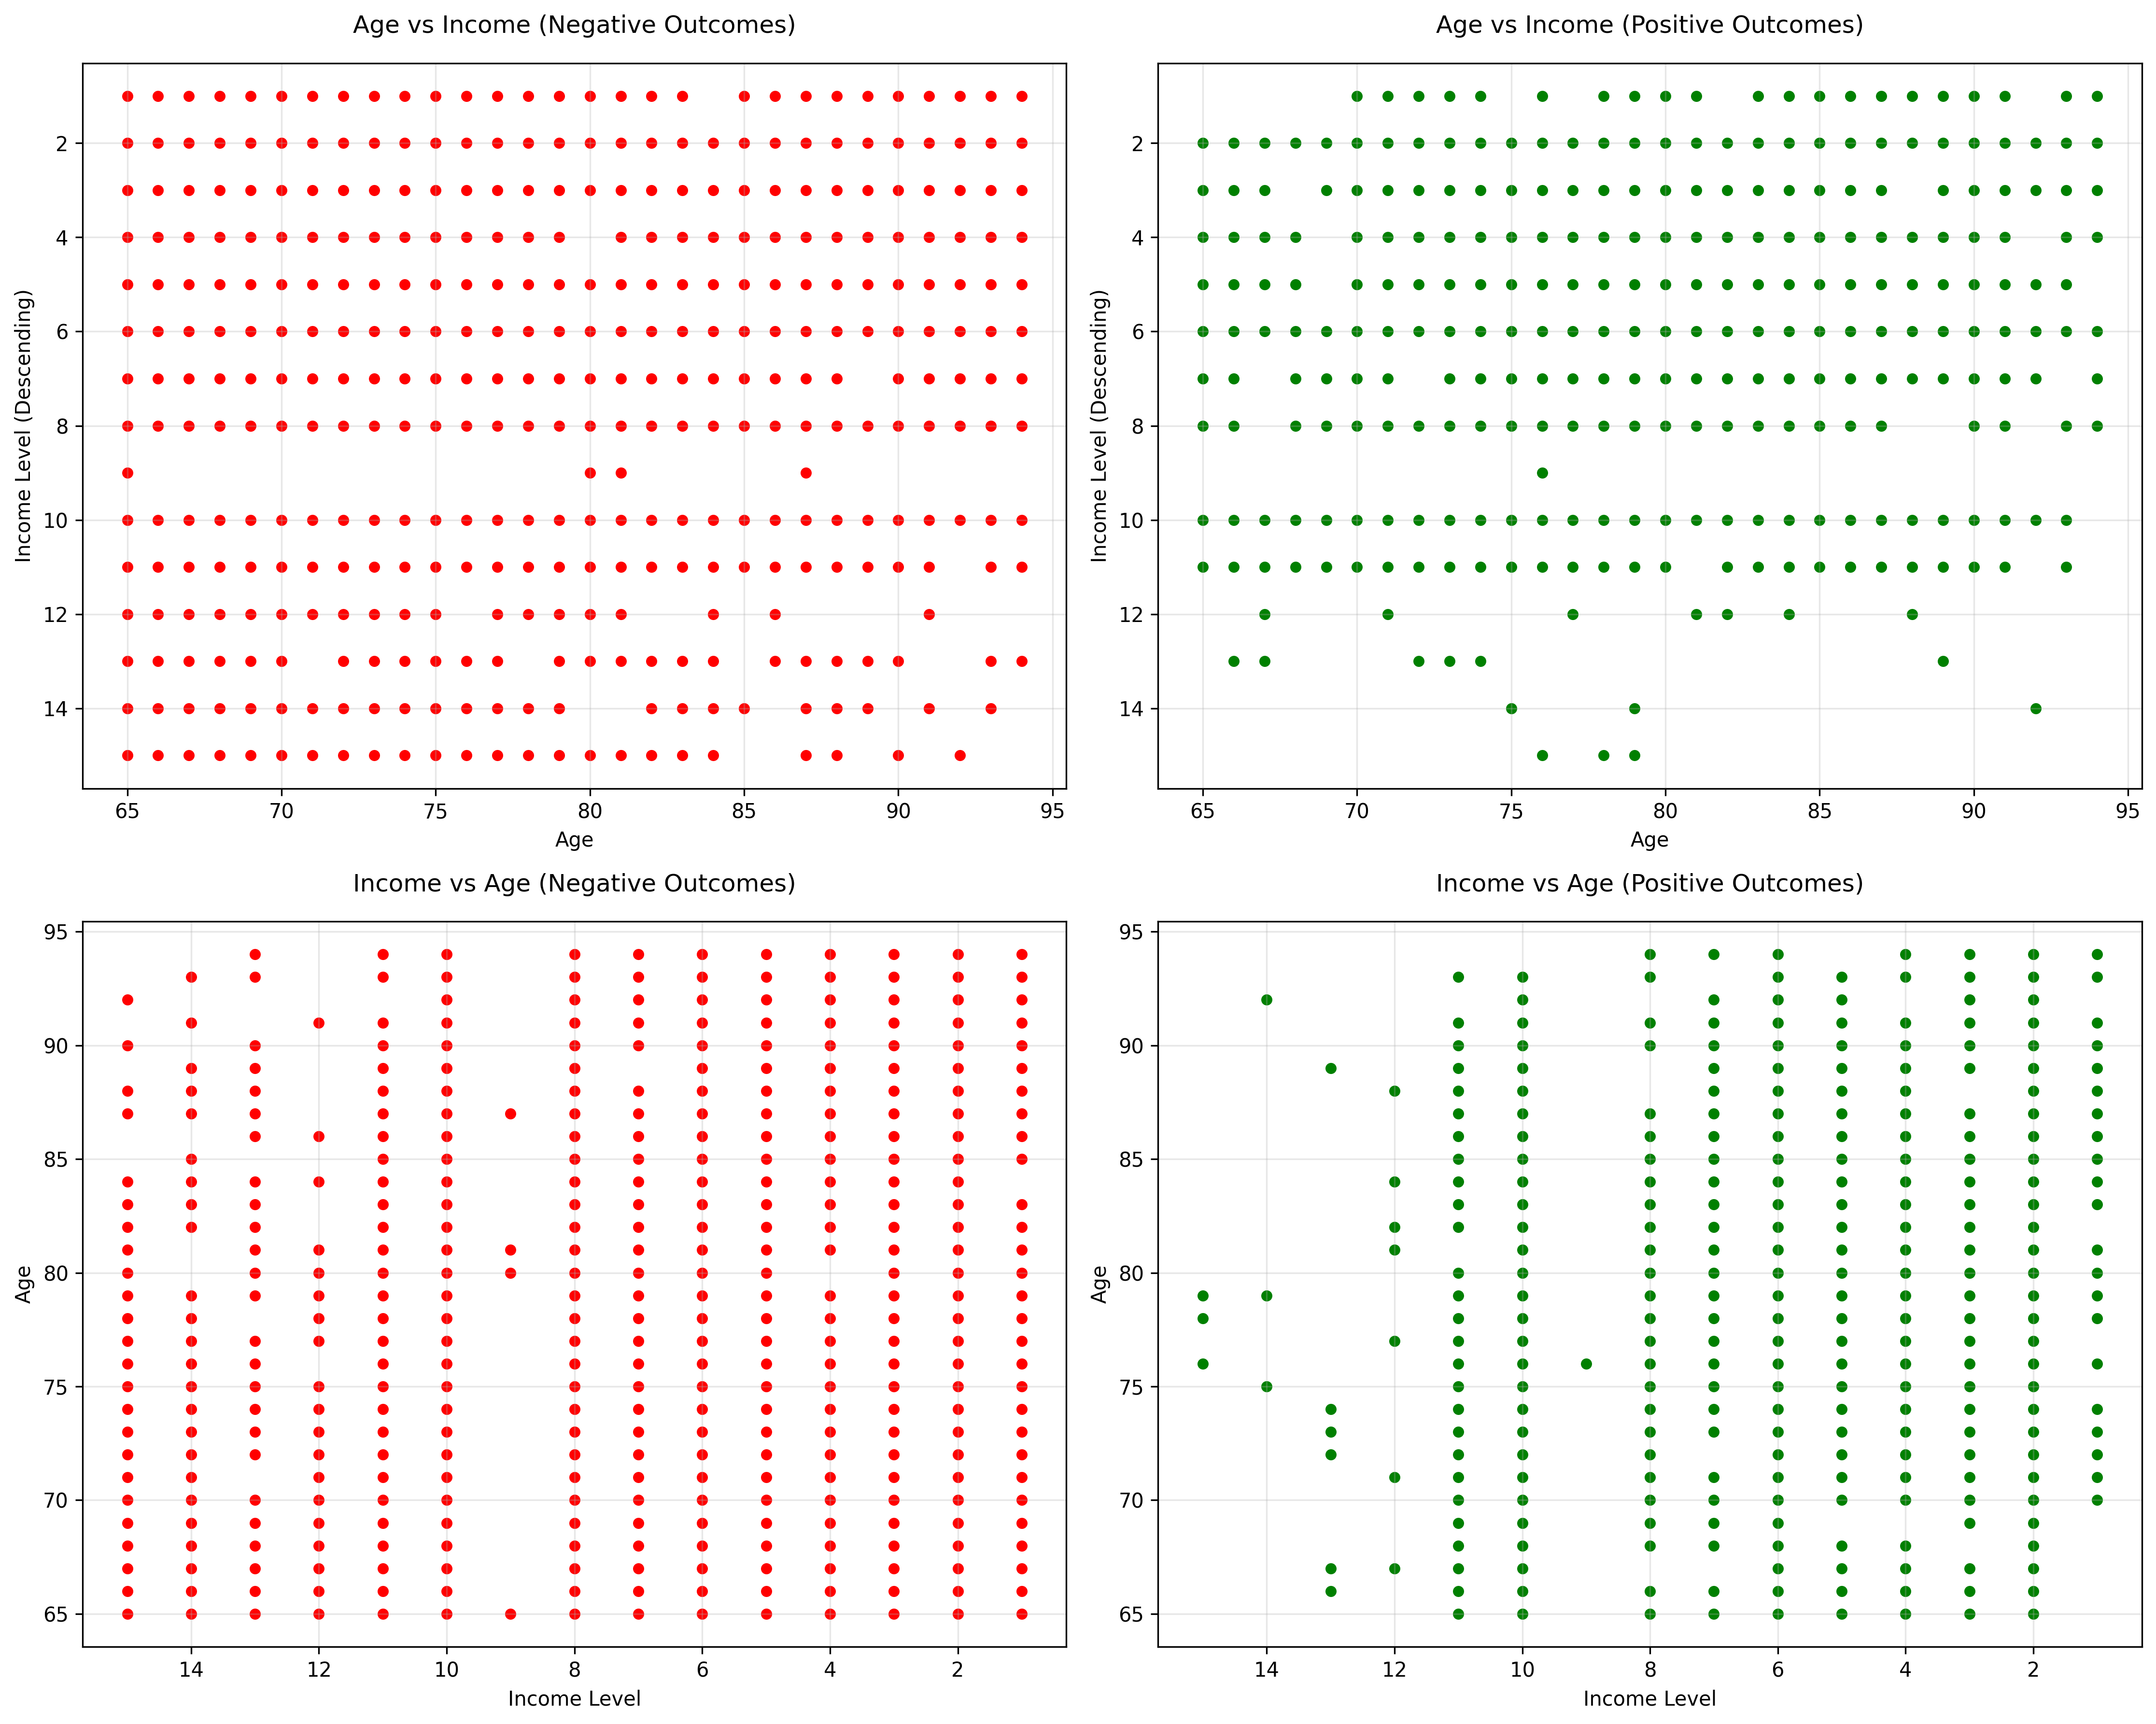

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set higher DPI and style for better quality
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

# Create figure with four subplots in a 2x2 grid
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Age vs Income (Negative Outcomes)
sns.scatterplot(data=data[data['target'] == 0], 
                x='age', 
                y='income',
                color='red',
                ax=ax1)

ax1.set_title('Age vs Income (Negative Outcomes)', fontsize=12, pad=15)
ax1.set_xlabel('Age', fontsize=10)
ax1.set_ylabel('Income Level (Descending)', fontsize=10)
ax1.invert_yaxis()
ax1.grid(True, alpha=0.3)

# Plot 2: Age vs Income (Positive Outcomes)
sns.scatterplot(data=data[data['target'] == 1],
                x='age', 
                y='income',
                color='green',
                ax=ax2)

ax2.set_title('Age vs Income (Positive Outcomes)', fontsize=12, pad=15)
ax2.set_xlabel('Age', fontsize=10)
ax2.set_ylabel('Income Level (Descending)', fontsize=10)
ax2.invert_yaxis()
ax2.grid(True, alpha=0.3)

# Plot 3: Income vs Age (Negative Outcomes)
sns.scatterplot(data=data[data['target'] == 0],
                x='income',
                y='age',
                color='red', 
                ax=ax3)

ax3.set_title('Income vs Age (Negative Outcomes)', fontsize=12, pad=15)
ax3.set_xlabel('Income Level', fontsize=10)
ax3.set_ylabel('Age', fontsize=10)
ax3.invert_xaxis()
ax3.grid(True, alpha=0.3)

# Plot 4: Income vs Age (Positive Outcomes)
sns.scatterplot(data=data[data['target'] == 1],
                x='income',
                y='age',
                color='green',
                ax=ax4)

ax4.set_title('Income vs Age (Positive Outcomes)', fontsize=12, pad=15)
ax4.set_xlabel('Income Level', fontsize=10)
ax4.set_ylabel('Age', fontsize=10)
ax4.invert_xaxis()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

If within the individual observations there was a strong pattern of increasing posative outcomes as income decreased and age increased, then this would greatly enhance the predictive power of our Logistic Regression model. However as there is not such a trend present within the data, there is much less contrast to distinguish posative outcomes from negative. 

As the probability of a logistic regression model is simply the sum of the individual probabilities produced by each variable's term the Logistic Regression model will assaign observations with the lowest income and highest age the greatest probability of posative response. Where as as evident by the plots that is not the relationship which is a driver for posative outcome. 

Such predictions will be especially innacuate as the model produced predicts an increasing probability of response as age increases past 80 of which the trend is actually that probability of response by age peaks a little paste 80 and then begins to level off.  

Thus the logistic regression model will not represent the relationship between age and posative response correctly leading to false predictions. Nor is there a strong relationship of our 2 most powerful predictors within the data set that will magnify the most likely responders by their probability being the sum of P(low income) + P(high age)

Thus the patterns in the data of which Logisitc Regression is dependent to make good predictions is absent. 

There is another attribute of the data we failed to recognise before producing a model and that is to account for interactions between the variables that would render the probabilities produced by one dependent of another rather than simply being a sum of the probabilities produced by each variables term 

# What is the real driver that predicts response. 

In [15]:
# Get top 10 predictions from logistic regression model
data_sorted_lr = data.copy()
data_sorted_lr['predicted_probs'] = lr_model.predict_proba(X)[:, 1]
data_sorted_lr = data_sorted_lr.sort_values('predicted_probs', ascending=False).head(10)

print("Top feature combinations leading to highest confidence predictions:\n")
print("Top 10 combinations with highest predicted probability:\n")
print(data_sorted_lr[['age', 'income', 'dist', 'gender', 'marital_status', 'predicted_probs']].to_string())


Top feature combinations leading to highest confidence predictions:

Top 10 combinations with highest predicted probability:

      age  income  dist  gender  marital_status  predicted_probs
3917   94       2     1       1               1         0.648037
2393   94       2     2       1               1         0.645123
442    94       2     3       1               1         0.642198
862    90       1     2       1               1         0.627674
460    92       2     1       1               1         0.626457
2151   94       3     0       1               1         0.625239
264    90       1     5       1               1         0.618691
61     93       2     8       1               1         0.616442
1935   94       3     3       1               1         0.616234
31     92       2     7       1               1         0.608387



Analyzing patterns in strong positive predictions...

Summary statistics for cases where model is very confident of positive outcome (prob > 0.9):


,age,dist,income,gender,marital_status
count,69.000000,69.000000,69.000000,69.000000,69.000000
mean,82.565217,4.231884,5.463768,0.710145,0.811594
std,4.347001,5.401919,2.997939,0.457019,0.393901
min,74.000000,0.000000,1.000000,0.000000,0.000000
25%,79.000000,0.000000,3.000000,0.000000,1.000000
50%,82.000000,2.000000,5.000000,1.000000,1.000000
75%,86.000000,5.000000,8.000000,1.000000,1.000000
max,93.000000,18.000000,11.000000,1.000000,1.000000



Correlation of features with prediction confidence:


predicted_probs    1.000000
age                0.308585
gender             0.106436
marital_status     0.066759
dist              -0.059270
income            -0.232083
Name: predicted_probs, dtype: float64


Top feature combinations leading to highest confidence predictions:

Top 30 combinations with highest predicted probability:
 age  dist  income  gender  marital_status  predicted_probs
  80    16       4       1               1             0.99
  80    16       4       1               1             0.99
  79     0       2       0               1             0.98
  77     5      11       1               1             0.98
  85     2      10       1               1             0.98
  85     2      10       1               1             0.98
  87     0       7       1               1             0.98
  77     5      11       1               1             0.98
  79     0       2       0               1             0.98
  77     5      11       1               1             0.98


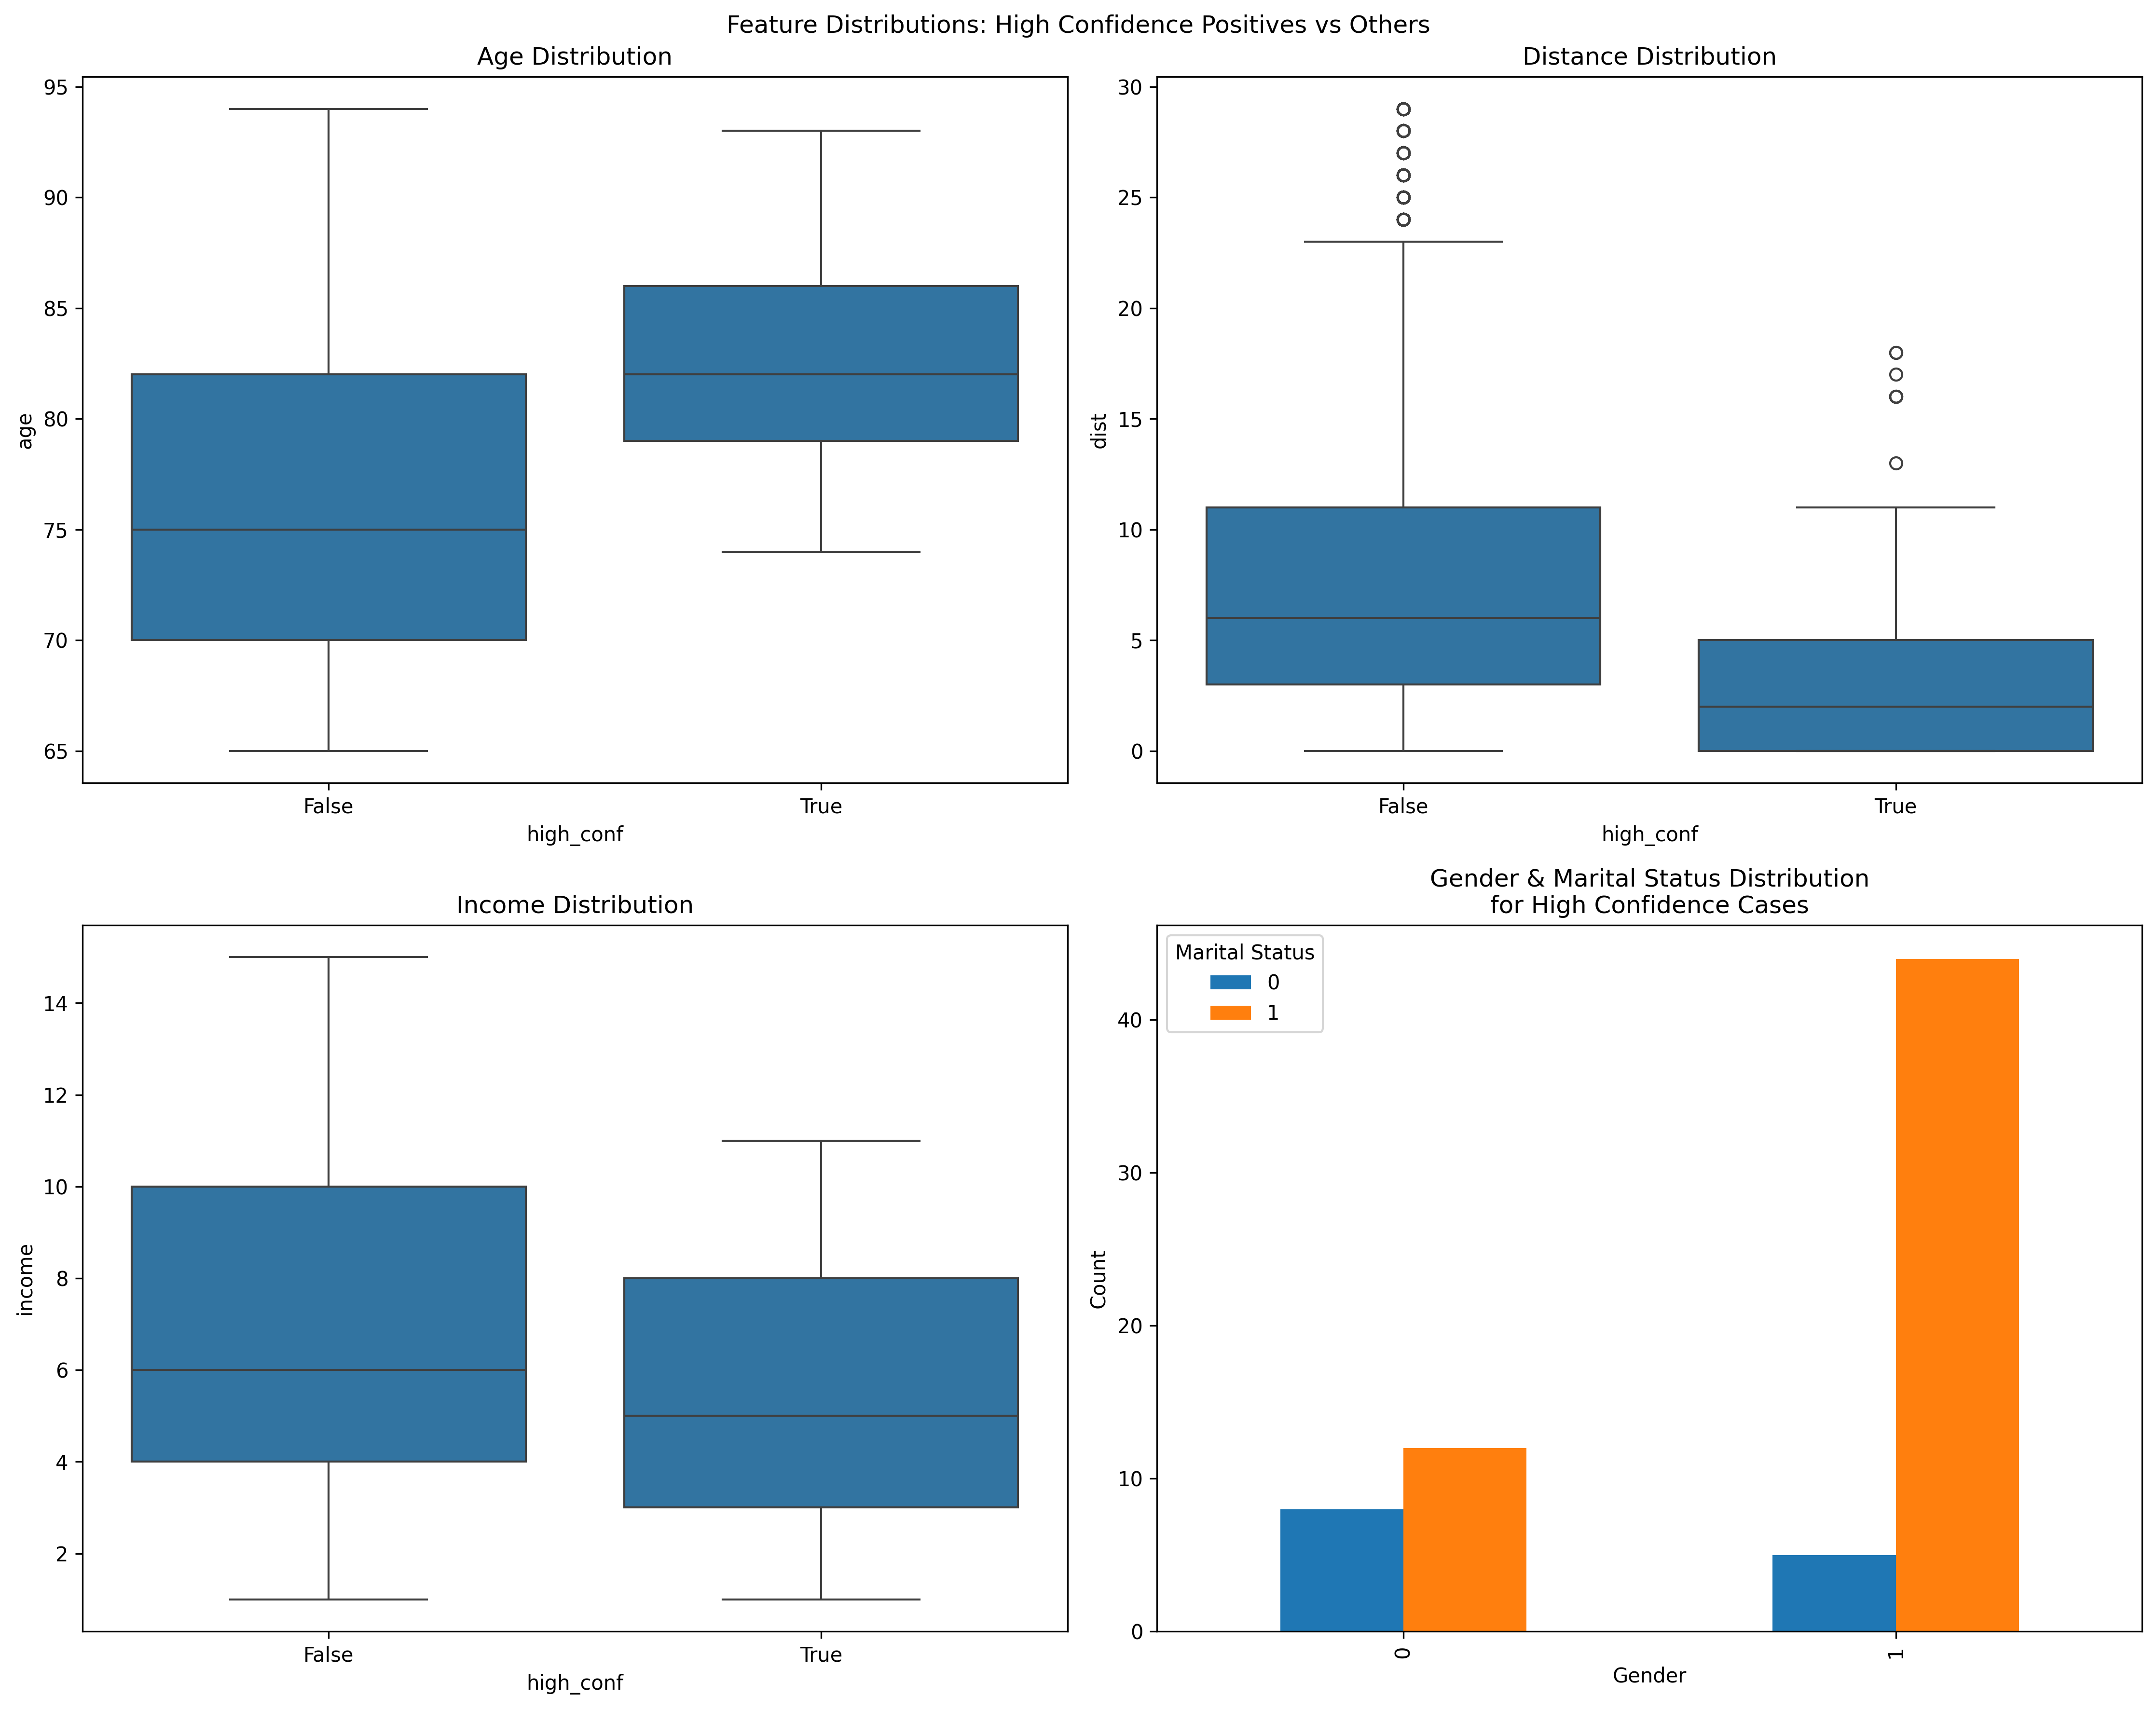

In [19]:
# Analyze patterns of high-confidence positive predictions
print("\nAnalyzing patterns in strong positive predictions...")

# Get samples where model is very confident of positive outcome (predicted_probs > 0.9)
high_confidence_positives = data_sorted[data_sorted['predicted_probs'] > 0.9].copy()

# Calculate summary statistics for these high-confidence cases
print("\nSummary statistics for cases where model is very confident of positive outcome (prob > 0.9):")
summary_stats = high_confidence_positives[['age', 'dist', 'income', 'gender', 'marital_status']].describe()
display(summary_stats)

# Calculate feature importance based on correlation with predicted probabilities
print("\nCorrelation of features with prediction confidence:")
correlations = data_sorted[['age', 'dist', 'income', 'gender', 'marital_status', 'predicted_probs']].corr()['predicted_probs'].sort_values(ascending=False)
display(correlations)

# Print combinations with highest confidence
print("\nTop feature combinations leading to highest confidence predictions:")
high_conf_combos = high_confidence_positives[['age', 'dist', 'income', 'gender', 'marital_status', 'predicted_probs']]
high_conf_combos = high_conf_combos.sort_values('predicted_probs', ascending=False).head(10)
print("\nTop 30 combinations with highest predicted probability:")
print(high_conf_combos.to_string(index=False))

# Visualize distribution of key features for high confidence predictions vs others
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Feature Distributions: High Confidence Positives vs Others')

# Age distribution
sns.boxplot(x='high_conf', y='age', 
           data=data_sorted.assign(high_conf=data_sorted['predicted_probs'] > 0.9),
           ax=axes[0,0])
axes[0,0].set_title('Age Distribution')

# Distance distribution
sns.boxplot(x='high_conf', y='dist',
           data=data_sorted.assign(high_conf=data_sorted['predicted_probs'] > 0.9),
           ax=axes[0,1])
axes[0,1].set_title('Distance Distribution')

# Income distribution
sns.boxplot(x='high_conf', y='income',
           data=data_sorted.assign(high_conf=data_sorted['predicted_probs'] > 0.9),
           ax=axes[1,0])
axes[1,0].set_title('Income Distribution')

# Categorical features - regular bar plot
cat_data = data_sorted.assign(high_conf=data_sorted['predicted_probs'] > 0.9)
cat_data = cat_data[cat_data['high_conf']]
gender_marital_counts = pd.crosstab(cat_data['gender'], cat_data['marital_status'])
gender_marital_counts.plot(kind='bar', ax=axes[1,1])
axes[1,1].set_title('Gender & Marital Status Distribution\nfor High Confidence Cases')
axes[1,1].set_xlabel('Gender')
axes[1,1].set_ylabel('Count')
axes[1,1].legend(title='Marital Status')

plt.tight_layout()
plt.show()

| Statistic |    Age |   Distance |   Income |   Gender | Marital Status |
|-----------|--------|------------|----------|----------|----------------|
| Count     | 69.000 |    69.000  |  69.000  |  69.000  |       69.000   |
| Mean      | 82.565 |     4.232  |   5.464  |   0.710  |        0.812   |
| Std       |  4.347 |     5.402  |   2.998  |   0.457  |        0.394   |
| Min       | 74.000 |     0.000  |   1.000  |   0.000  |        0.000   |
| Max       | 93.000 |    18.000  |  11.000  |   1.000  |        1.000   |


This is the summary of the the top combinations with probability of posative response greater than 90% found by the Random Forest model. 

The pattern is clear. 

The optimal age was 82, this is evident by the plot of proportion of responses that were posative for each age, peaking a little after age 80. 

Distance didn't matter, the 3rd row was the minimum distance while the first 2 rows were at the max distance 

Income did not matter, if you remove the female observations, the min and max is from 4 to 11 which is contains 80% of the distribution of the variable over the entire data set. If you include female observations, even more. 

Gender and matrital status are connected. 

30% of the top 90% predicted prob combinations were women of which marital stats was not signifigant. 

however, 70% of the 90% predicted prob combinations were men of which an insignifigant proportion were unmarried. 

The target demo is precisely married men, aged from 77 to 88. 



## The target demo is precisely married men, aged from 77 to 88. 